In [1]:
# useful article about OHLC data aggregation:
# applicable to websocket streams of tick by tick data
# https://blog.quantinsti.com/tick-tick-ohlc-data-pandas-tutorial/


In [2]:
# jupyter did not want to load already installed talib library 
# so had to reinstall it via anaconda as well 
#!conda install -c conda-forge ta-lib
import talib as ta
import yfinance as yf
import pandas as pd
import sqlite3

In [3]:
# custom function imports
from functions_gen import *        # general functions
from functions_ml import *         # machine learning
from functions_viz import *        # visualization
from functions_db import *         # database

# custom indicators moved to modules
from functions_superjump import *
from functions_HHLL import *
from functions_HHLL_conf import *
from functions_HHLL_channel import *

In [4]:
# ml model specific imports
from functions_forest import *       # Random Forest classifier
#from functions_nn import *          # Neural Net classifier, not needed when using forest

In [5]:
# sqlite database structure is following:
#
#sqlite> .header on
#sqlite> .mode column
#sqlite> select * from alpaca_websocket_stream_data LIMIT 10;
#timestamp                            symbol  price   size  exchange  conditions  tape  id   
#-----------------------------------  ------  ------  ----  --------  ----------  ----  -----
#2022-07-19 15:49:25.477387108-04:00  AAPL    150.8   100   V         ['@']       C     10807
#32022-07-19 15:49:27.252579851-04:00  AAPL    150.81  3     V         ['@', 'I']  C     10808
#2022-07-19 15:49:27.252579851-04:00  AAPL    150.81  100   V         ['@']       C     10809
#2022-07-19 15:49:27.666163652-04:00  AAPL    150.81  100   V         ['@']       C     10810
#2022-07-19 15:49:27.666164795-04:00  AAPL    150.81  200   V         ['@']       C     10811
#2022-07-19 15:49:29.248316808-04:00  AAPL    150.79  100   V         ['@']       C     10812
#2022-07-19 15:49:32.963910211-04:00  AAPL    150.78  35    V         ['@', 'I']  C     10813
#2022-07-19 15:49:36.611092454-04:00  AAPL    150.77  2     V         ['@', 'I']  C     10814
#2022-07-19 15:49:36.612940345-04:00  AAPL    150.77  100   V         ['@']       C     10815
#2022-07-19 15:49:37.083678369-04:00  AAPL    150.76  100   V         ['@']       C     10816
#sqlite> 





# Exploratory data wrangling
Optionally uncomment the code to get insights to individual steps.
Can be useful for db troubleshooting later

In [6]:
# connect to sqlite database and get all data where symbol is AAPL
# symbol is external variable
# pandas to onnect to database and aggregate price data to 1 minute granularity in pandas

#symbol='AAPL'
#
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = ?", (symbol,))
#data = c.fetchall()
#conn.close()

In [7]:
#data

In [8]:
# LOAD ONE DAY BACK

# connect to sqlite database and get all data where symbol is AAPL
# timestamp is from 24 hours ago to now
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = 'AAPL' AND timestamp BETWEEN datetime('now', '-1 month') AND datetime('now')")
#data = c.fetchall()
#conn.close()

In [9]:
#data

In [10]:
# load data to dataframe
#df = pd.DataFrame(data, columns=["timestamp", "symbol", "price", "size", "exchange", "conditions", "tape", "id"])

In [11]:
#df

In [12]:
#df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ns")

In [13]:
#df["date"] = df["timestamp"].dt.date

In [14]:
#df

In [15]:
#df = df.set_index("timestamp")


In [16]:
#df_resampled = df['price'].resample("1Min").ohlc(_method='ohlc')

In [17]:
#df_resampled

In [18]:
#df = df.reset_index()
#df = df.sort_values(by=["symbol"])

# Making function flow
one function for getting the data for specific ticker from the database
another function to process the df into resampled df with 1 and 5 min granularity

In [19]:
symbol = 'AAPL'
db_name = 'alpaca_websocket_stream_data.db'
table_name= 'alpaca_websocket_stream_data'
granularity = '1Min'
interval = "1m"  # for yahoo finance model training if needed 

In [20]:
# gets data only for last n days for given ticker
#data =  get_ticker_data_from_db_days_back(symbol, db_name, table_name)

In [21]:
#data

In [22]:
# gets all data from db for given ticker
data =  get_ticker_data_from_db(symbol, db_name, table_name)

In [23]:
data

[('2022-08-08 12:06:31.433462691-04:00',
  'AAPL',
  165.53,
  100,
  'V',
  "['@']",
  'C',
  5782),
 ('2022-08-08 12:06:36.680078094-04:00',
  'AAPL',
  165.55,
  3,
  'V',
  "['@', 'I']",
  'C',
  5783),
 ('2022-08-08 12:06:37.846831934-04:00',
  'AAPL',
  165.55,
  22,
  'V',
  "['@', 'I']",
  'C',
  5784),
 ('2022-08-08 12:06:38.395748672-04:00',
  'AAPL',
  165.55,
  100,
  'V',
  "['@']",
  'C',
  5785),
 ('2022-08-08 12:06:40.046341339-04:00',
  'AAPL',
  165.555,
  2,
  'V',
  "['@', 'I']",
  'C',
  5786),
 ('2022-08-08 12:06:40.276663432-04:00',
  'AAPL',
  165.56,
  100,
  'V',
  "['@']",
  'C',
  5787),
 ('2022-08-08 12:06:46.121391343-04:00',
  'AAPL',
  165.58,
  100,
  'V',
  "['@']",
  'C',
  5788),
 ('2022-08-08 12:06:51.930069615-04:00',
  'AAPL',
  165.585,
  100,
  'V',
  "['@']",
  'C',
  5789),
 ('2022-08-08 12:06:51.952792899-04:00',
  'AAPL',
  165.585,
  100,
  'V',
  "['@']",
  'C',
  5790),
 ('2022-08-08 12:06:52.042848997-04:00',
  'AAPL',
  165.585,
  300,


In [24]:
# resample tick by tick data from db to minute timeframe and save to df
df_db =  resample_data(data, granularity=granularity)

In [25]:
df_db

,Date,Open,High,Low,Close,Adj Close
0,2022-08-08 12:06:00-04:00,165.530,165.585,165.530,165.570,165.570
1,2022-08-08 12:07:00-04:00,165.565,165.575,165.400,165.420,165.420
2,2022-08-08 12:08:00-04:00,165.405,165.470,165.255,165.255,165.255
3,2022-08-08 12:09:00-04:00,165.220,165.240,165.015,165.040,165.040
4,2022-08-08 12:10:00-04:00,165.120,165.240,165.120,165.190,165.190
...,...,...,...,...,...,...
1589,2022-08-09 14:35:00-04:00,165.030,165.030,164.945,164.945,164.945
1590,2022-08-09 14:36:00-04:00,164.985,165.050,164.985,165.020,165.020
1591,2022-08-09 14:37:00-04:00,164.990,165.120,164.960,165.075,165.075
1592,2022-08-09 14:38:00-04:00,165.040,165.040,164.950,165.000,165.000


## Model training (Random Forest)

In [26]:
# not needed so far, we can import pretrained model

In [27]:
# but best to allow for training here as well

In [28]:
def training_sequence(tickers, interval="1m", model_name="./random_forest.joblib"):
    # initiates training sequence for random forest classifier

    for ticker in tickers:
        print('ticker: ', ticker)
        df = get_data(ticker, interval)
        plot_train_data(df, ticker)


        #print(df)

        # custom indicator extension:
        # create extra features from new indicators into new dfs
        # and then join the dfs based on minute datetime with original df
        # our model also needs 1/0 instead of True/False
        # thrend_conf col needs conversion from 'u','d' to 1,0
        out_df1 = superjumpTBB(df)      # superjumpTBB
        out_df1.replace({False: 0, True: 1}, inplace=True)

        out_df2 = HHLL_Strategy(df)  # HHHL indicator
        out_df2.replace({False: 0, True: 1}, inplace=True)

        out_df3 = HHLL_confirmation(df)  # HHHL indicator
        out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)

        out_df4 = HHLL_Channel(df)
        


        df = compute_technical_indicators(df)
        df = compute_features(df)
        df = define_target_condition(df)

        # TODO, verify that inner join is what we really need
        # merging with new dataframes with custom indicators
        df = pd.merge(df, out_df1, how='inner', on='Date')
        df = pd.merge(df, out_df2, how='inner', on='Date')
        df = pd.merge(df, out_df3, how='inner', on='Date')
        df = pd.merge(df, out_df4, how='inner', on='Date')

        #print('regular df')
        #print(df)

        clf = splitting_and_training(df)

        save_model(clf, model_name)
        
        # commenting out saves time during training
        #df = predict_timeseries(df, clf)
        #plot_stock_prediction(df, ticker)

    return None

In [29]:
# training stock data
tickers = ['SPY', 'F', 'IBM', 'GE', 'AAPL', 'ADM'] 

ticker:  SPY
[*********************100%***********************]  1 of 1 completed
connected to yahoo


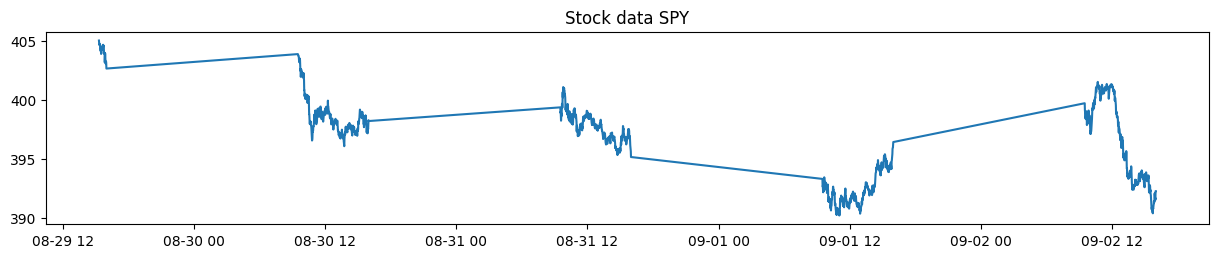

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       297
           1       0.72      0.55      0.62       184

    accuracy                           0.74       481
   macro avg       0.74      0.71      0.71       481
weighted avg       0.74      0.74      0.74       481

ticker:  F
[*********************100%***********************]  1 of 1 completed
connected to yahoo


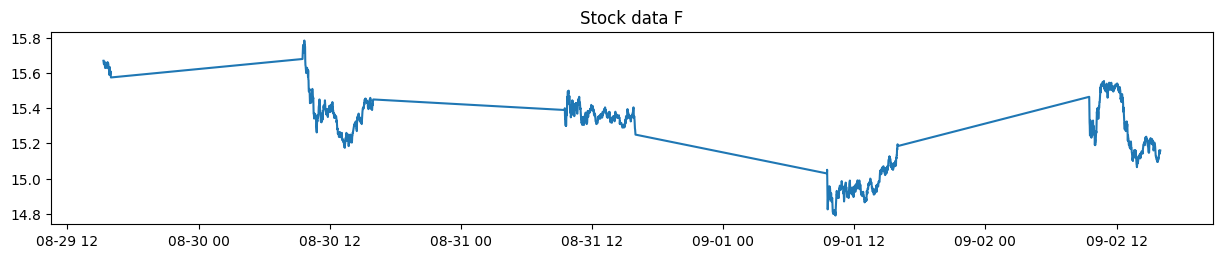

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       268
           1       0.73      0.63      0.68       213

    accuracy                           0.74       481
   macro avg       0.74      0.73      0.73       481
weighted avg       0.74      0.74      0.73       481

ticker:  IBM
[*********************100%***********************]  1 of 1 completed
connected to yahoo


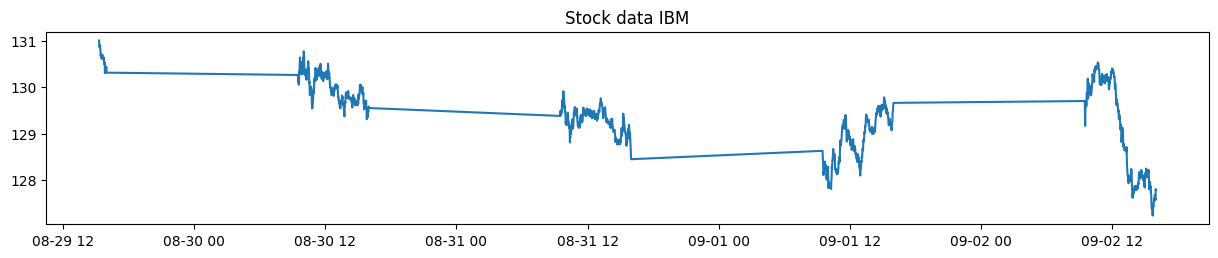

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       290
           1       0.67      0.48      0.56       191

    accuracy                           0.70       481
   macro avg       0.69      0.66      0.67       481
weighted avg       0.70      0.70      0.69       481

ticker:  GE
[*********************100%***********************]  1 of 1 completed
connected to yahoo


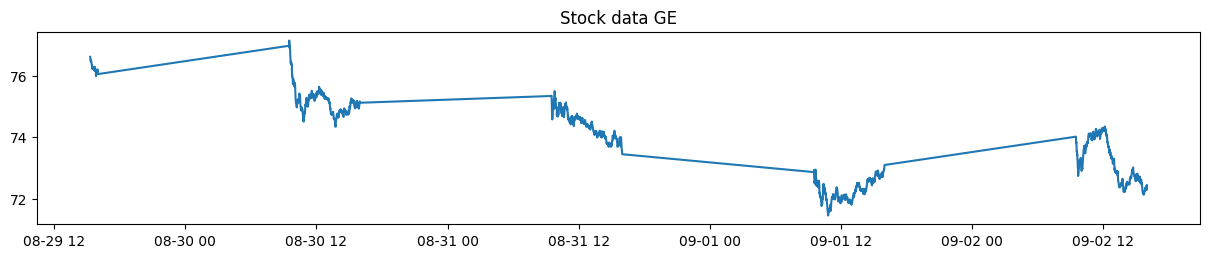

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       321
           1       0.79      0.54      0.64       160

    accuracy                           0.80       481
   macro avg       0.80      0.74      0.75       481
weighted avg       0.80      0.80      0.79       481

ticker:  AAPL
[*********************100%***********************]  1 of 1 completed
connected to yahoo


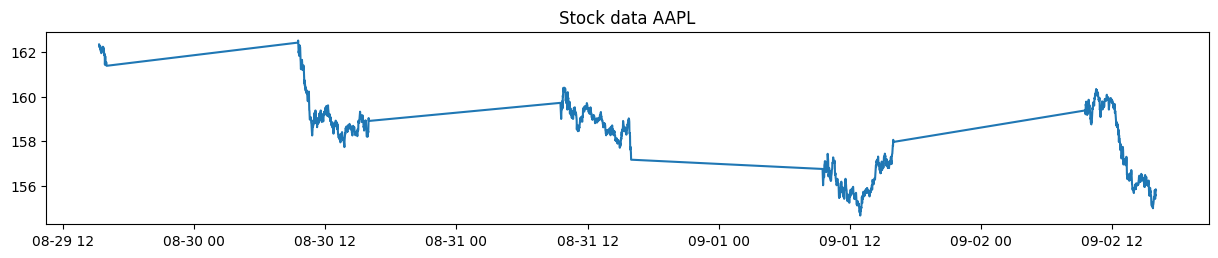

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       302
           1       0.71      0.56      0.62       179

    accuracy                           0.75       481
   macro avg       0.74      0.71      0.72       481
weighted avg       0.75      0.75      0.74       481

ticker:  ADM
[*********************100%***********************]  1 of 1 completed
connected to yahoo


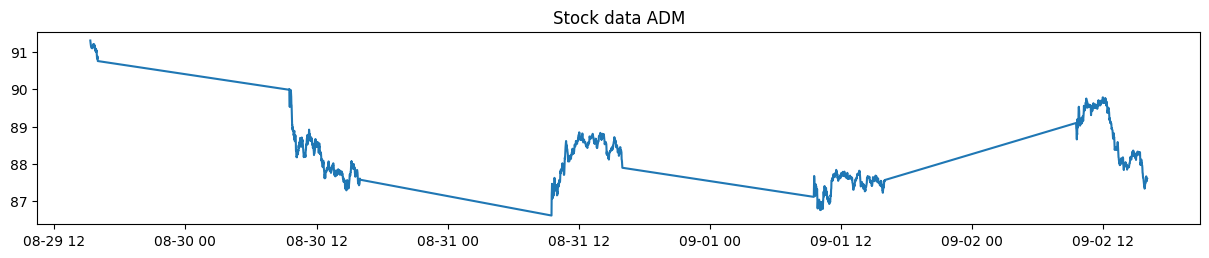

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       261
           1       0.73      0.62      0.67       218

    accuracy                           0.72       479
   macro avg       0.73      0.72      0.72       479
weighted avg       0.73      0.72      0.72       479



In [30]:
training_sequence(tickers, interval="1m", model_name="./random_forest.joblib")

## Feature importance visualization 
(Random Forest only)

In [31]:
# load classifier, no need to initialize the loaded_rf
clf = joblib.load("./random_forest.joblib")

In [32]:
predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','RSI','oversoldRSI','overboughtRSI',
                   'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40','aboveEMA50',
                   'aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90',
                   'aboveEMA100','aboveEMA200',
                   'LongSig','ShortSig','WLongSig','WShortSig',
                   'HH','LL','HL','LH',
                   'trend_conf','HHLL_channel_sig'
                  ]

Elapsed time to compute the importances: 0.105 seconds


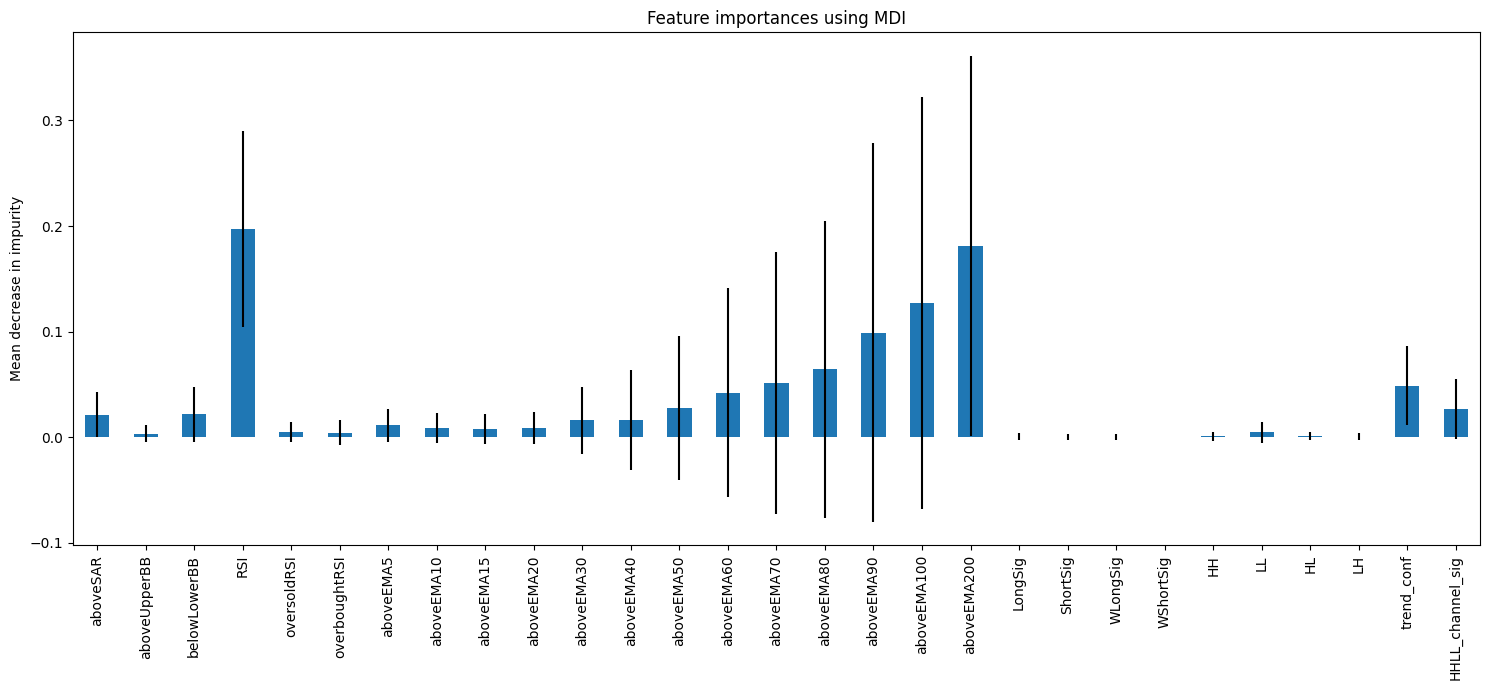

In [33]:
plot_forest_feature_importances(clf, predictors_list)

# Predictions
- now we have dataframe and can compute whatever indicators we want
- and then connect it to our predictive model and even visualize in streamlit

In [34]:
# load classifier, no need to initialize the loaded_rf
clf = joblib.load("./random_forest.joblib")

In [35]:
# this is dataframe from db
df_db.tail(2)

,Date,Open,High,Low,Close,Adj Close
1592,2022-08-09 14:38:00-04:00,165.04,165.04,164.95,165.00,165.00
1593,2022-08-09 14:39:00-04:00,165.00,165.00,164.99,164.99,164.99


#### Temporary workaround
Due to issue with custom indicators interacting with db data, we will take 1 minute data from yahoo for now.

In [36]:
# temp workaround since some indicator failing
# they might be failing maybe because some NaN values in our df from database
# need to investigate in detail
df = get_data(symbol, interval)



[*********************100%***********************]  1 of 1 completed
connected to yahoo


In [37]:
df.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1600,2022-09-02 15:59:00-04:00,155.550003,155.919998,155.449997,155.850006,155.850006,1207451
1601,2022-09-02 16:00:00-04:00,155.809998,155.809998,155.809998,155.809998,155.809998,0


<AxesSubplot:>

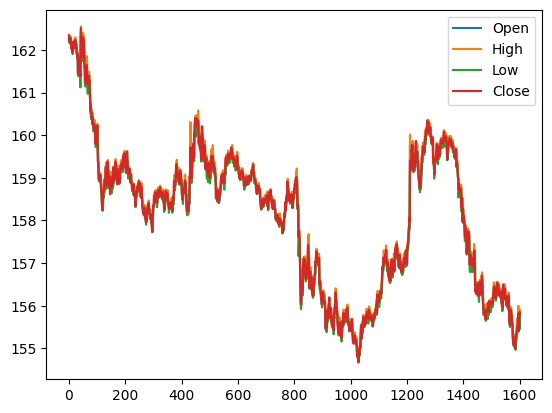

In [38]:
# --- plot whole dataframe ---
#df[['Open','High','Low','Close', 'EMA20']].plot()
df[['Open','High','Low','Close']].plot()

<AxesSubplot:>

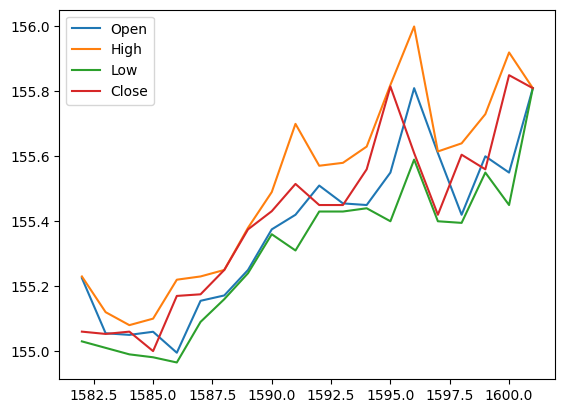

In [39]:
# --- plot tail of the dataframe ---
df[['Open','High','Low','Close']].iloc[-20:].plot()

In [40]:
# we take df that was taken from db and resampled to minute granularity (1min, 5min)
# and we will compute various indicators for it
# including custom indicators

In [41]:
# prepare dfs with extra indicators
out_df1 = superjumpTBB(df)      # superjumpTBB
out_df1.replace({False: 0, True: 1}, inplace=True)

out_df2 = HHLL_Strategy(df)  # HHHL indicator
out_df2.replace({False: 0, True: 1}, inplace=True)

out_df3 = HHLL_confirmation(df)  # HHLL confirmation
# converting 'u','d', 'none' to integers for 'trend_conf' col
out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)

out_df4 = HHLL_Channel(df)

In [42]:
# compute general indicators, features and target
df = compute_technical_indicators(df)
df = compute_features(df)
df = define_target_condition(df)

In [43]:
# merge with custom indicators
df = pd.merge(df, out_df1, how='inner', on='Date')
df = pd.merge(df, out_df2, how='inner', on='Date')
df = pd.merge(df, out_df3, how='inner', on='Date')
df = pd.merge(df, out_df4, how='inner', on='Date')

In [44]:
df.tail(2)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,EMA5,EMA10,EMA15,...,trend_conf,firstLBar,firstLPrice,latestLBar,latestLPrice,firstHBar,firstHPrice,latestHBar,latestHPrice,HHLL_channel_sig
1600,2022-09-02 15:59:00-04:00,155.550003,155.919998,155.449997,155.850006,155.850006,1207451,155.655558,155.574889,155.525947,...,1,1598.0,155.395004,1600,155.449997,1581,155.330002,1585,155.100006,1
1601,2022-09-02 16:00:00-04:00,155.809998,155.809998,155.809998,155.809998,155.809998,0,155.707038,155.617636,155.561454,...,1,1598.0,155.395004,1600,155.449997,1581,155.330002,1585,155.100006,1


In [45]:
# actual prediction
# can take longer if the dataframe is big
predict_timeseries(df, clf)

df length:  1602
step:  0 predicted class:  1.0
step:  1 predicted class:  1.0
step:  2 predicted class:  1.0
step:  3 predicted class:  1.0
step:  4 predicted class:  1.0
step:  5 predicted class:  1.0
step:  6 predicted class:  1.0
step:  7 predicted class:  1.0
step:  8 predicted class:  1.0
step:  9 predicted class:  1.0
step:  10 predicted class:  1.0
step:  11 predicted class:  1.0
step:  12 predicted class:  1.0
step:  13 predicted class:  1.0
step:  14 predicted class:  0.0
step:  15 predicted class:  0.0
step:  16 predicted class:  0.0
step:  17 predicted class:  0.0
step:  18 predicted class:  0.0
step:  19 predicted class:  0.0
step:  20 predicted class:  0.0
step:  21 predicted class:  0.0
step:  22 predicted class:  0.0
step:  23 predicted class:  0.0
step:  24 predicted class:  0.0
step:  25 predicted class:  0.0
step:  26 predicted class:  0.0
step:  27 predicted class:  0.0
step:  28 predicted class:  0.0
step:  29 predicted class:  0.0
step:  30 predicted class:  0.0
s

step:  252 predicted class:  0.0
step:  253 predicted class:  0.0
step:  254 predicted class:  0.0
step:  255 predicted class:  0.0
step:  256 predicted class:  0.0
step:  257 predicted class:  0.0
step:  258 predicted class:  0.0
step:  259 predicted class:  0.0
step:  260 predicted class:  0.0
step:  261 predicted class:  0.0
step:  262 predicted class:  0.0
step:  263 predicted class:  0.0
step:  264 predicted class:  0.0
step:  265 predicted class:  0.0
step:  266 predicted class:  0.0
step:  267 predicted class:  0.0
step:  268 predicted class:  0.0
step:  269 predicted class:  0.0
step:  270 predicted class:  0.0
step:  271 predicted class:  0.0
step:  272 predicted class:  0.0
step:  273 predicted class:  0.0
step:  274 predicted class:  0.0
step:  275 predicted class:  0.0
step:  276 predicted class:  0.0
step:  277 predicted class:  0.0
step:  278 predicted class:  0.0
step:  279 predicted class:  0.0
step:  280 predicted class:  0.0
step:  281 predicted class:  0.0
step:  282

step:  503 predicted class:  0.0
step:  504 predicted class:  0.0
step:  505 predicted class:  1.0
step:  506 predicted class:  1.0
step:  507 predicted class:  0.0
step:  508 predicted class:  0.0
step:  509 predicted class:  1.0
step:  510 predicted class:  1.0
step:  511 predicted class:  1.0
step:  512 predicted class:  0.0
step:  513 predicted class:  0.0
step:  514 predicted class:  0.0
step:  515 predicted class:  0.0
step:  516 predicted class:  0.0
step:  517 predicted class:  0.0
step:  518 predicted class:  0.0
step:  519 predicted class:  0.0
step:  520 predicted class:  0.0
step:  521 predicted class:  0.0
step:  522 predicted class:  0.0
step:  523 predicted class:  0.0
step:  524 predicted class:  0.0
step:  525 predicted class:  0.0
step:  526 predicted class:  0.0
step:  527 predicted class:  0.0
step:  528 predicted class:  0.0
step:  529 predicted class:  0.0
step:  530 predicted class:  0.0
step:  531 predicted class:  0.0
step:  532 predicted class:  0.0
step:  533

step:  754 predicted class:  0.0
step:  755 predicted class:  0.0
step:  756 predicted class:  0.0
step:  757 predicted class:  0.0
step:  758 predicted class:  0.0
step:  759 predicted class:  0.0
step:  760 predicted class:  0.0
step:  761 predicted class:  0.0
step:  762 predicted class:  0.0
step:  763 predicted class:  0.0
step:  764 predicted class:  0.0
step:  765 predicted class:  0.0
step:  766 predicted class:  0.0
step:  767 predicted class:  0.0
step:  768 predicted class:  0.0
step:  769 predicted class:  0.0
step:  770 predicted class:  0.0
step:  771 predicted class:  0.0
step:  772 predicted class:  0.0
step:  773 predicted class:  0.0
step:  774 predicted class:  0.0
step:  775 predicted class:  1.0
step:  776 predicted class:  1.0
step:  777 predicted class:  1.0
step:  778 predicted class:  1.0
step:  779 predicted class:  1.0
step:  780 predicted class:  1.0
step:  781 predicted class:  0.0
step:  782 predicted class:  1.0
step:  783 predicted class:  0.0
step:  784

step:  1004 predicted class:  0.0
step:  1005 predicted class:  0.0
step:  1006 predicted class:  0.0
step:  1007 predicted class:  0.0
step:  1008 predicted class:  0.0
step:  1009 predicted class:  0.0
step:  1010 predicted class:  0.0
step:  1011 predicted class:  0.0
step:  1012 predicted class:  0.0
step:  1013 predicted class:  0.0
step:  1014 predicted class:  0.0
step:  1015 predicted class:  0.0
step:  1016 predicted class:  0.0
step:  1017 predicted class:  0.0
step:  1018 predicted class:  0.0
step:  1019 predicted class:  0.0
step:  1020 predicted class:  0.0
step:  1021 predicted class:  0.0
step:  1022 predicted class:  0.0
step:  1023 predicted class:  0.0
step:  1024 predicted class:  0.0
step:  1025 predicted class:  0.0
step:  1026 predicted class:  0.0
step:  1027 predicted class:  0.0
step:  1028 predicted class:  0.0
step:  1029 predicted class:  0.0
step:  1030 predicted class:  0.0
step:  1031 predicted class:  0.0
step:  1032 predicted class:  0.0
step:  1033 pr

step:  1246 predicted class:  1.0
step:  1247 predicted class:  1.0
step:  1248 predicted class:  1.0
step:  1249 predicted class:  1.0
step:  1250 predicted class:  1.0
step:  1251 predicted class:  1.0
step:  1252 predicted class:  1.0
step:  1253 predicted class:  1.0
step:  1254 predicted class:  1.0
step:  1255 predicted class:  1.0
step:  1256 predicted class:  1.0
step:  1257 predicted class:  1.0
step:  1258 predicted class:  1.0
step:  1259 predicted class:  1.0
step:  1260 predicted class:  1.0
step:  1261 predicted class:  1.0
step:  1262 predicted class:  1.0
step:  1263 predicted class:  1.0
step:  1264 predicted class:  1.0
step:  1265 predicted class:  1.0
step:  1266 predicted class:  1.0
step:  1267 predicted class:  1.0
step:  1268 predicted class:  1.0
step:  1269 predicted class:  1.0
step:  1270 predicted class:  1.0
step:  1271 predicted class:  1.0
step:  1272 predicted class:  1.0
step:  1273 predicted class:  1.0
step:  1274 predicted class:  1.0
step:  1275 pr

step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 predicted class:  0.0
step:  1507 predicted class:  0.0
step:  1508 predicted class:  0.0
step:  1509 predicted class:  0.0
step:  1510 predicted class:  0.0
step:  1511 predicted class:  0.0
step:  1512 predicted class:  0.0
step:  1513 predicted class:  0.0
step:  1514 predicted class:  0.0
step:  1515 predicted class:  0.0
step:  1516 predicted class:  0.0
step:  1517 predicted class:  0.0
step:  1518 pr

,Date,Open_x,High_x,Low_x,Close_x,Adj Close,Volume,EMA5,EMA10,EMA15,...,firstLPrice,latestLBar,latestLPrice,firstHBar,firstHPrice,latestHBar,latestHPrice,HHLL_channel_sig,Buy,Long
0,2022-08-29 15:18:00-04:00,162.274994,162.359695,162.250000,162.335007,162.335007,0,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,0.000000,0,1.0,162.335007
1,2022-08-29 15:19:00-04:00,162.330002,162.360001,162.169998,162.235001,162.235001,102289,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,0.000000,1,1.0,162.235001
2,2022-08-29 15:20:00-04:00,162.210007,162.240005,162.199997,162.240005,162.240005,73762,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,0.000000,1,1.0,162.240005
3,2022-08-29 15:21:00-04:00,162.240005,162.274994,162.199997,162.220001,162.220001,29179,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,0.000000,1,1.0,162.220001
4,2022-08-29 15:22:00-04:00,162.220001,162.240005,162.169998,162.234894,162.234894,131009,162.252982,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,0.000000,1,1.0,162.234894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,2022-09-02 15:56:00-04:00,155.610001,155.615005,155.399994,155.419998,155.419998,355320,155.533755,155.480915,155.448630,...,154.964996,1594,155.440002,1581,155.330002,1585,155.100006,1,0.0,NaN
1598,2022-09-02 15:57:00-04:00,155.419998,155.639999,155.395004,155.604996,155.604996,301214,155.557502,155.503475,155.468176,...,154.964996,1594,155.440002,1581,155.330002,1585,155.100006,1,0.0,NaN
1599,2022-09-02 15:58:00-04:00,155.600098,155.729996,155.550003,155.559998,155.559998,395663,155.558334,155.513752,155.479653,...,154.964996,1594,155.440002,1581,155.330002,1585,155.100006,1,0.0,NaN
1600,2022-09-02 15:59:00-04:00,155.550003,155.919998,155.449997,155.850006,155.850006,1207451,155.655558,155.574889,155.525947,...,155.395004,1600,155.449997,1581,155.330002,1585,155.100006,1,0.0,NaN


### General prediction plots
does not work well for stocks with intra-day data (for example 1 minute granularity)

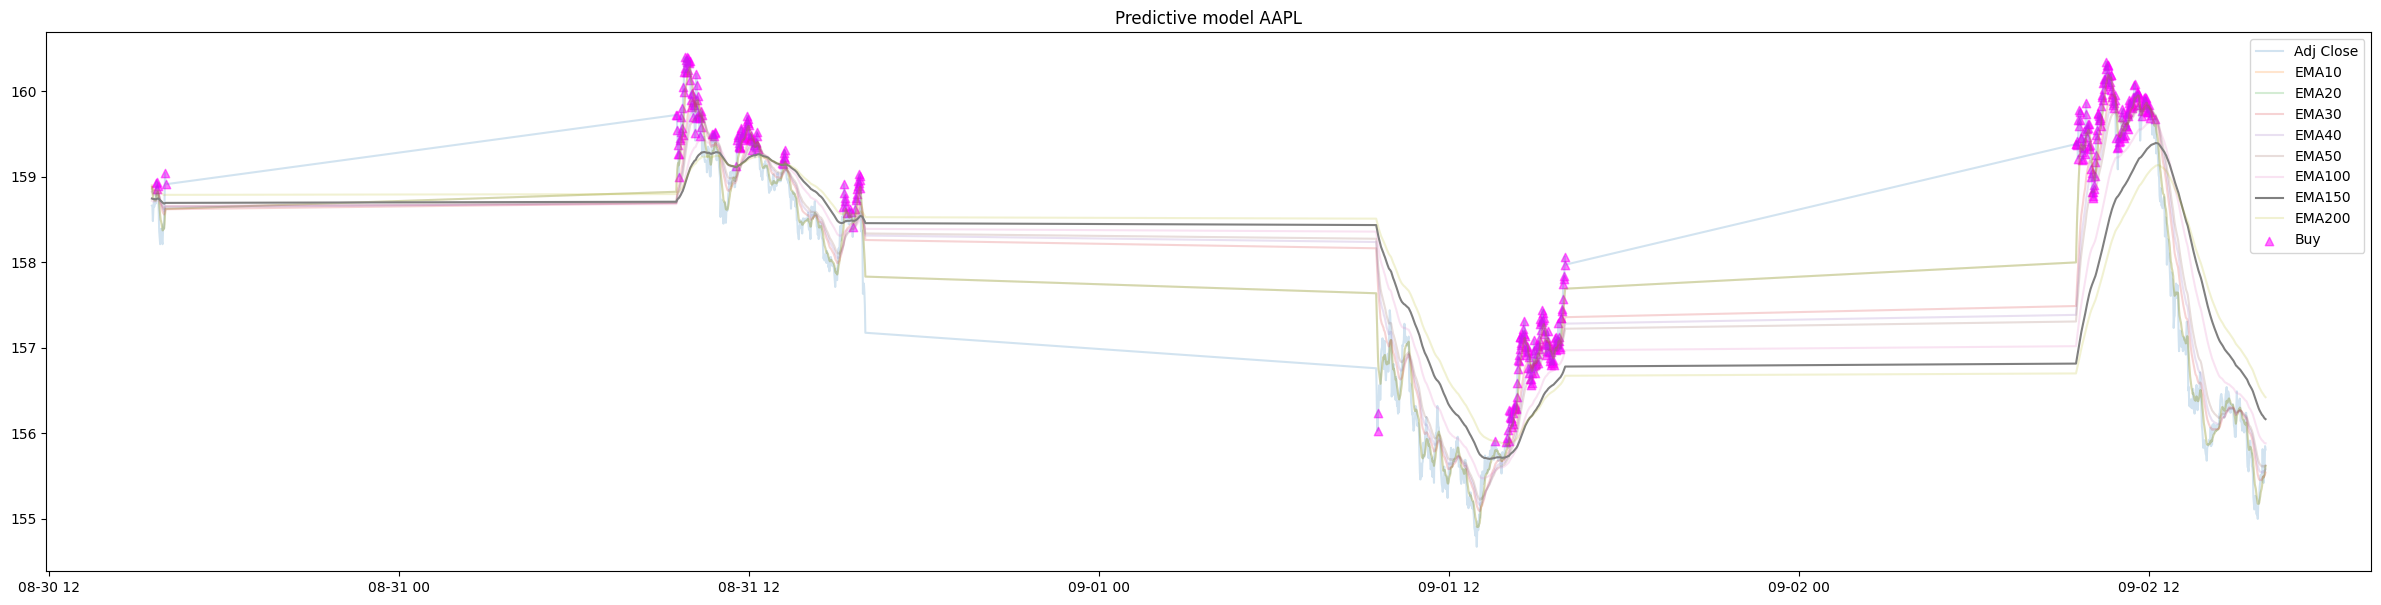

In [51]:
# high level view
ticks_back = 1200 # lookback n candles from now
plot_stock_prediction_tb(df, symbol, ticks_back)

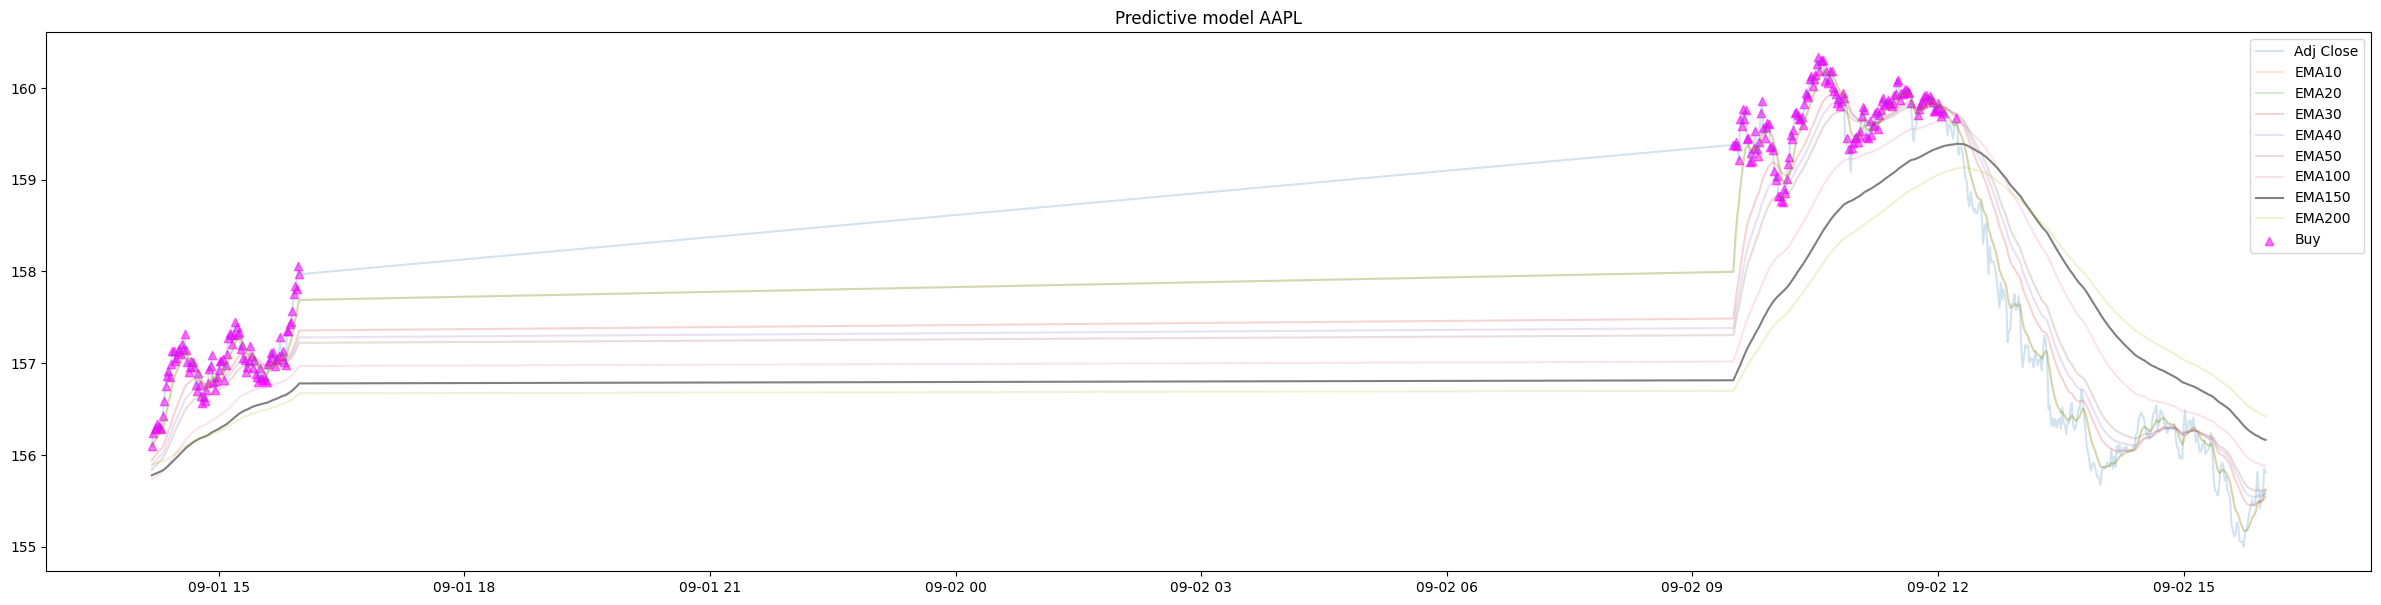

In [52]:
# zoomed in view
ticks_back = 500 # lookback n candles from now
plot_stock_prediction_tb(df, symbol, ticks_back)

### Intra day plots
good for stocks on 1 minute time granularity, manages intra day gaps in plots

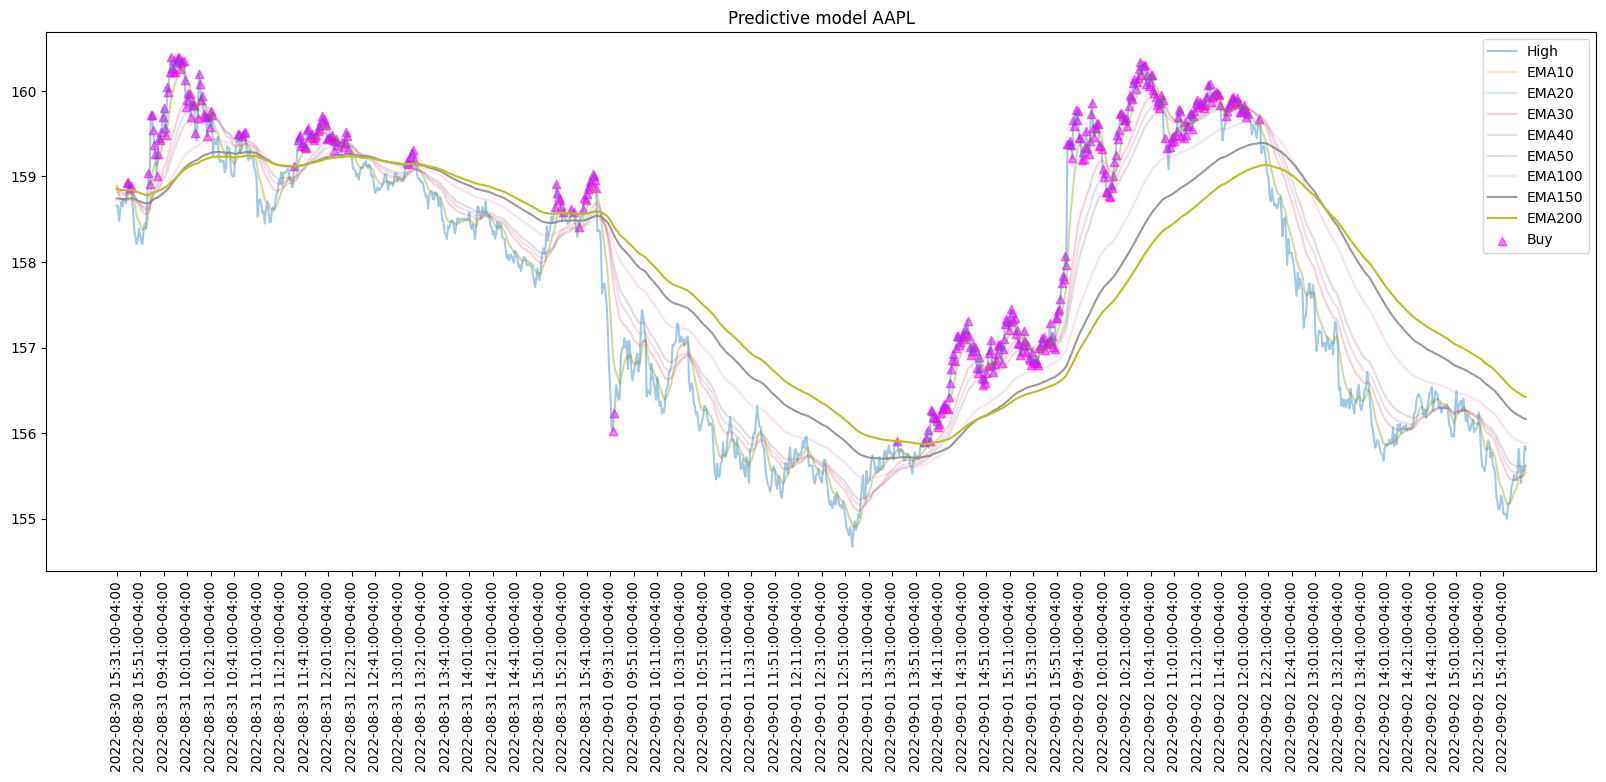

In [53]:
# high level view
ticks_back = 1200 # lookback n candles from now
plot_stock_prediction_zoom(df, symbol, ticks_back)

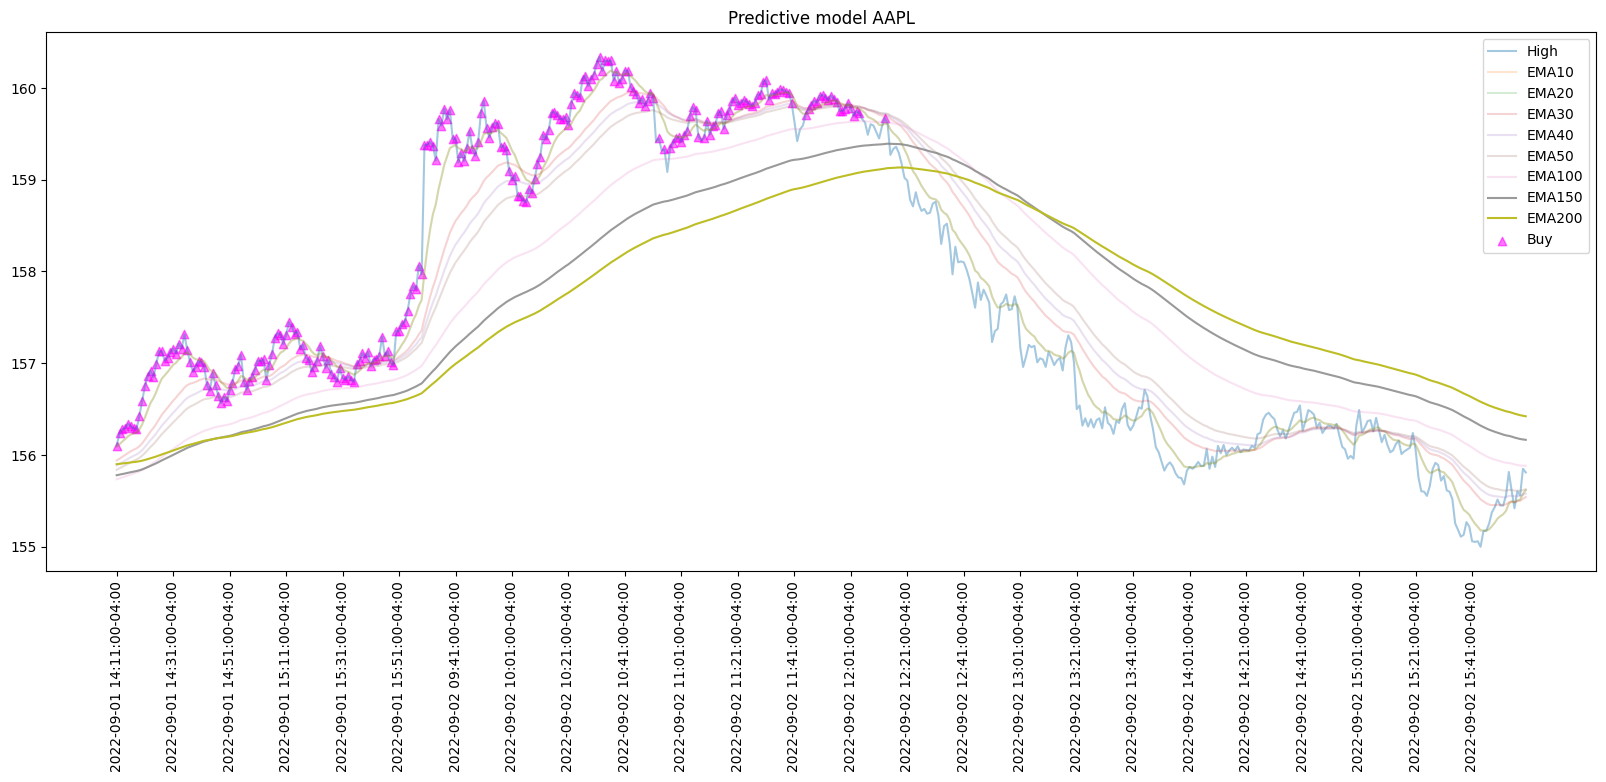

In [54]:
# zoomed in view
ticks_back = 500 # lookback n candles from now
plot_stock_prediction_zoom(df, symbol, ticks_back)

# Daemonize the script to run every minute
but running script every minute by cron should be more reliable, also prevents time drift

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 predicted class:  0.0
step:  1507 predicted class:  0.0
step:  1508 predicted class:  0.0
step:  1509 predicted class:  0.0
step:  1510 predicted class:  0.0
step:  1511 

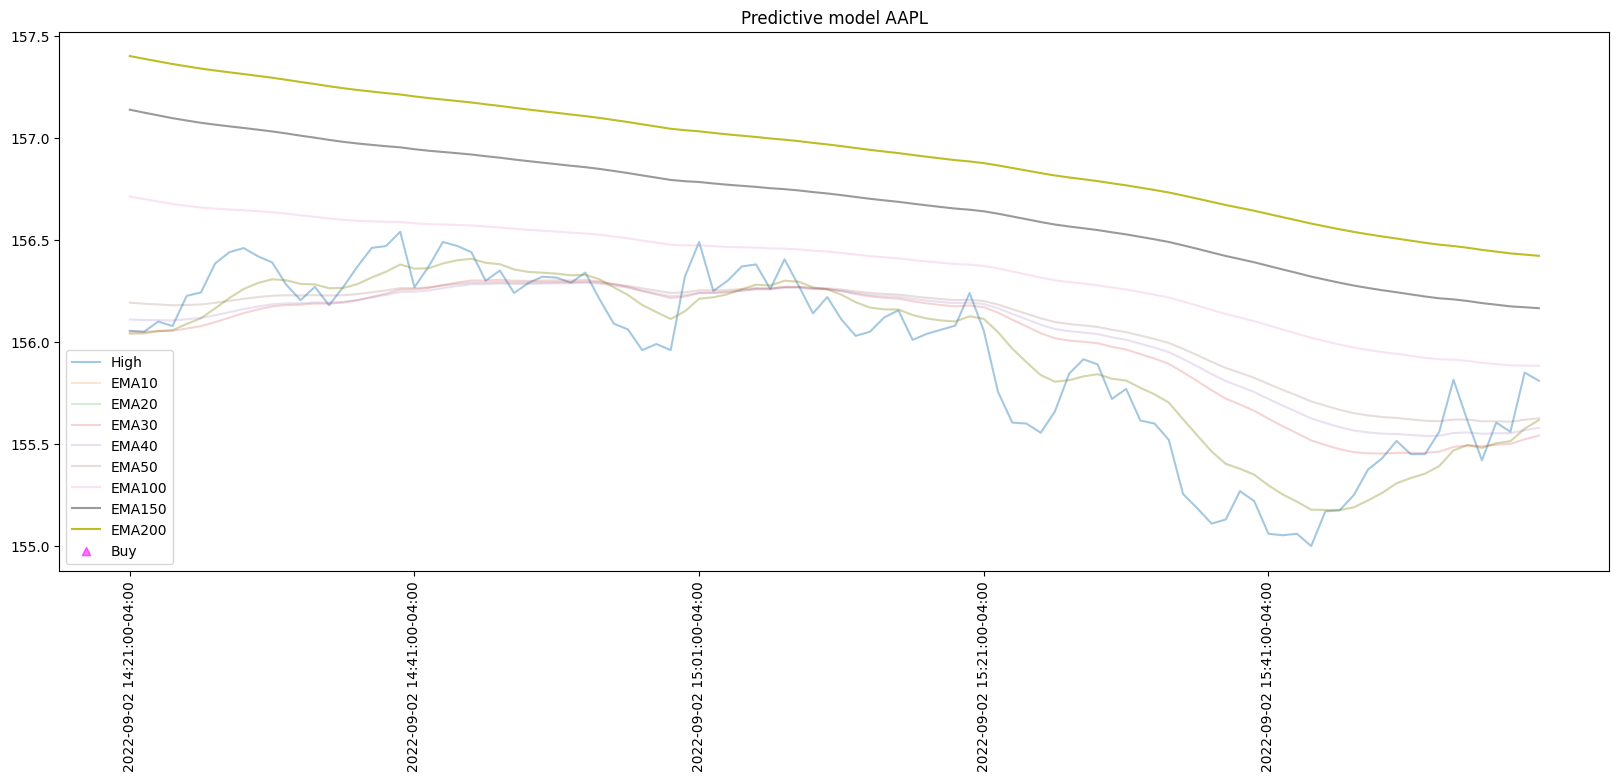

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 predicted class:  0.0
step:  1507 predicted class:  0.0
step:  1508 predicted class:  0.0
step:  1509 predicted class:  0.0
step:  1510 

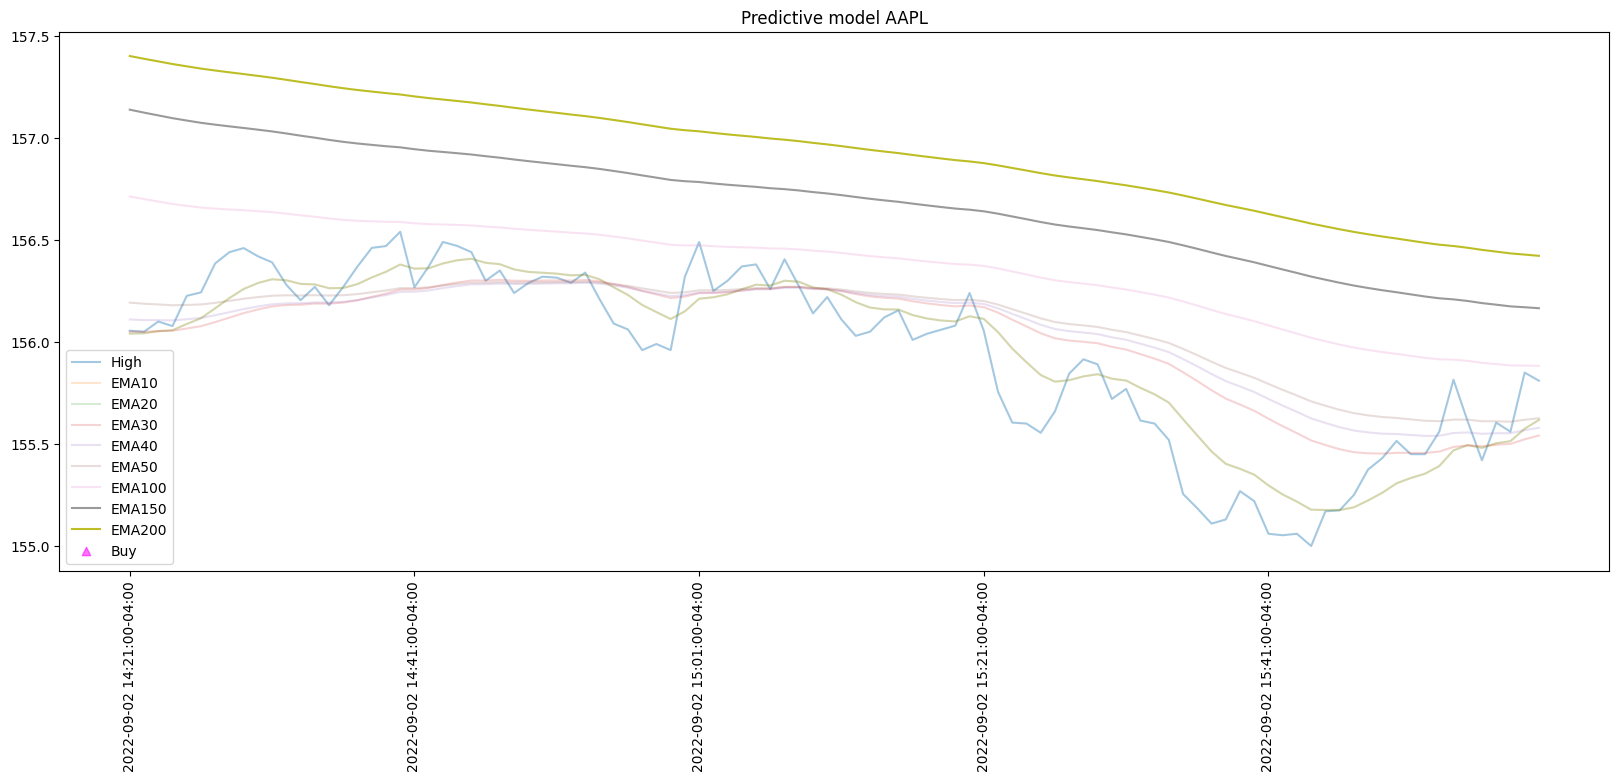

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 predicted class:  0.0
step:  1507 predicted class:  0.0
step:  1508 

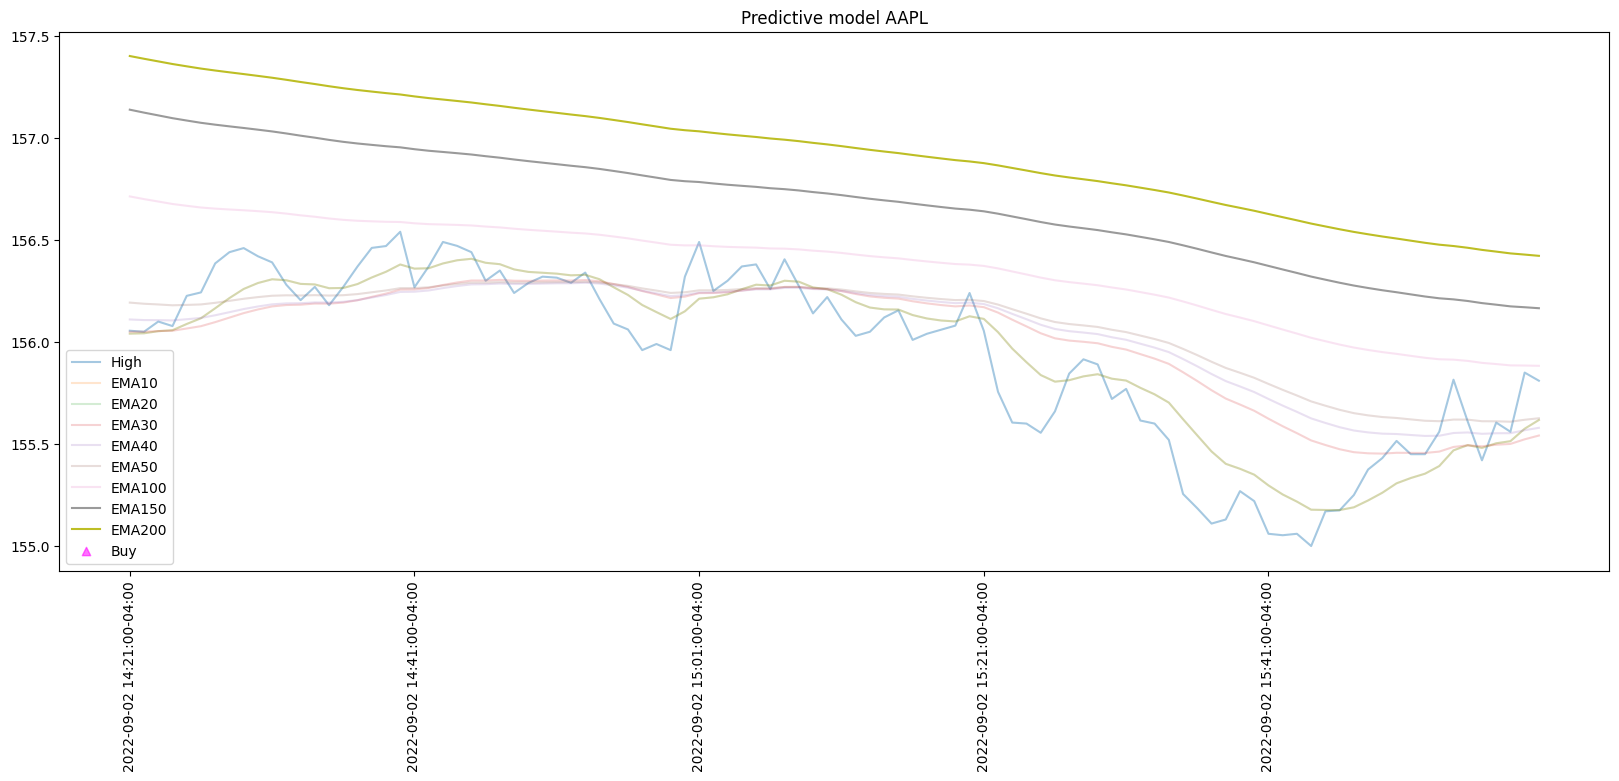

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 predicted class:  0.0
step:  1507 

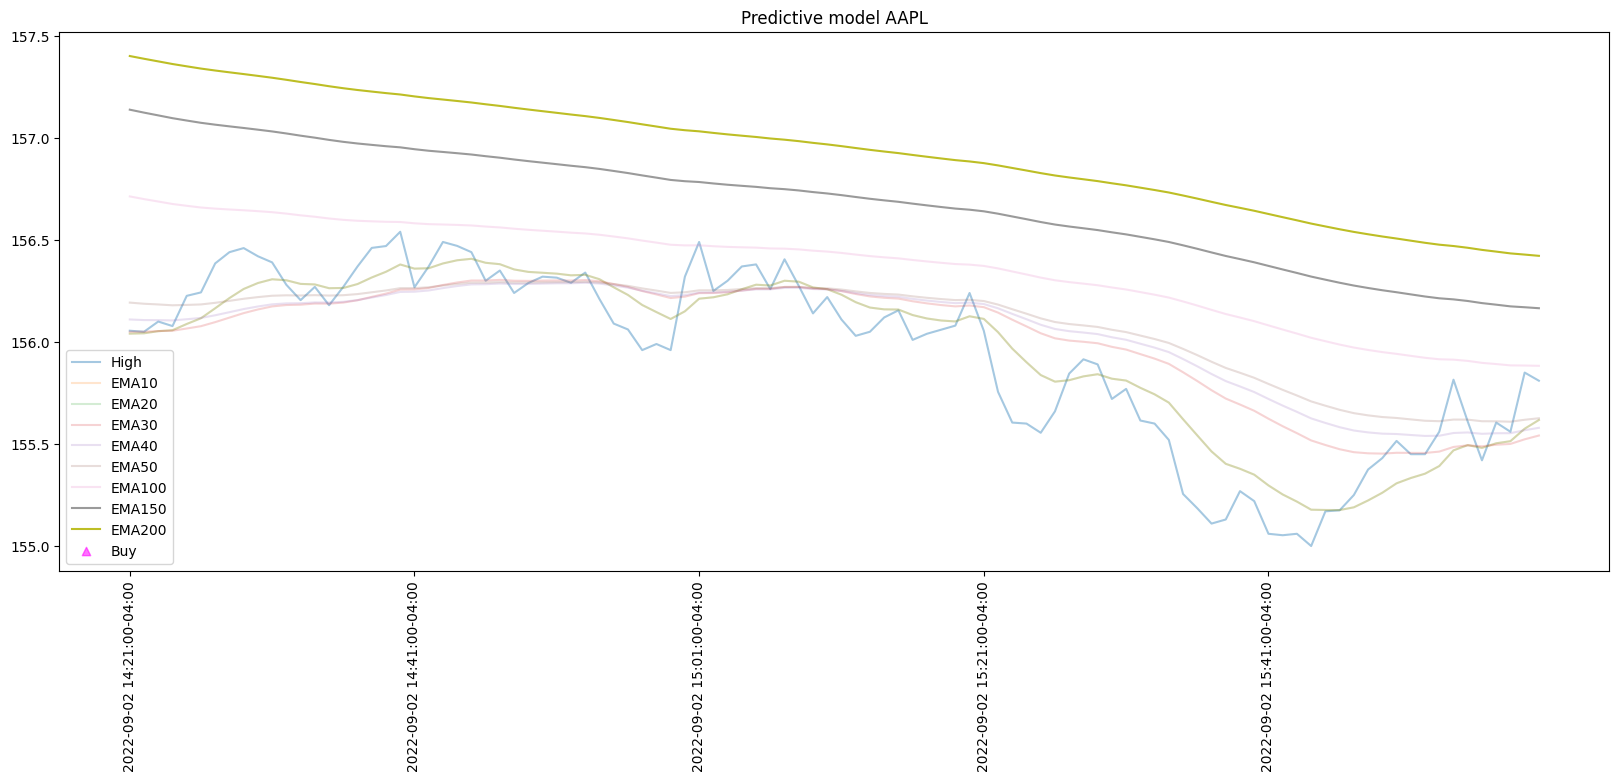

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1480 predicted class:  0.0
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 predicted class:  0.0
step:  1506 

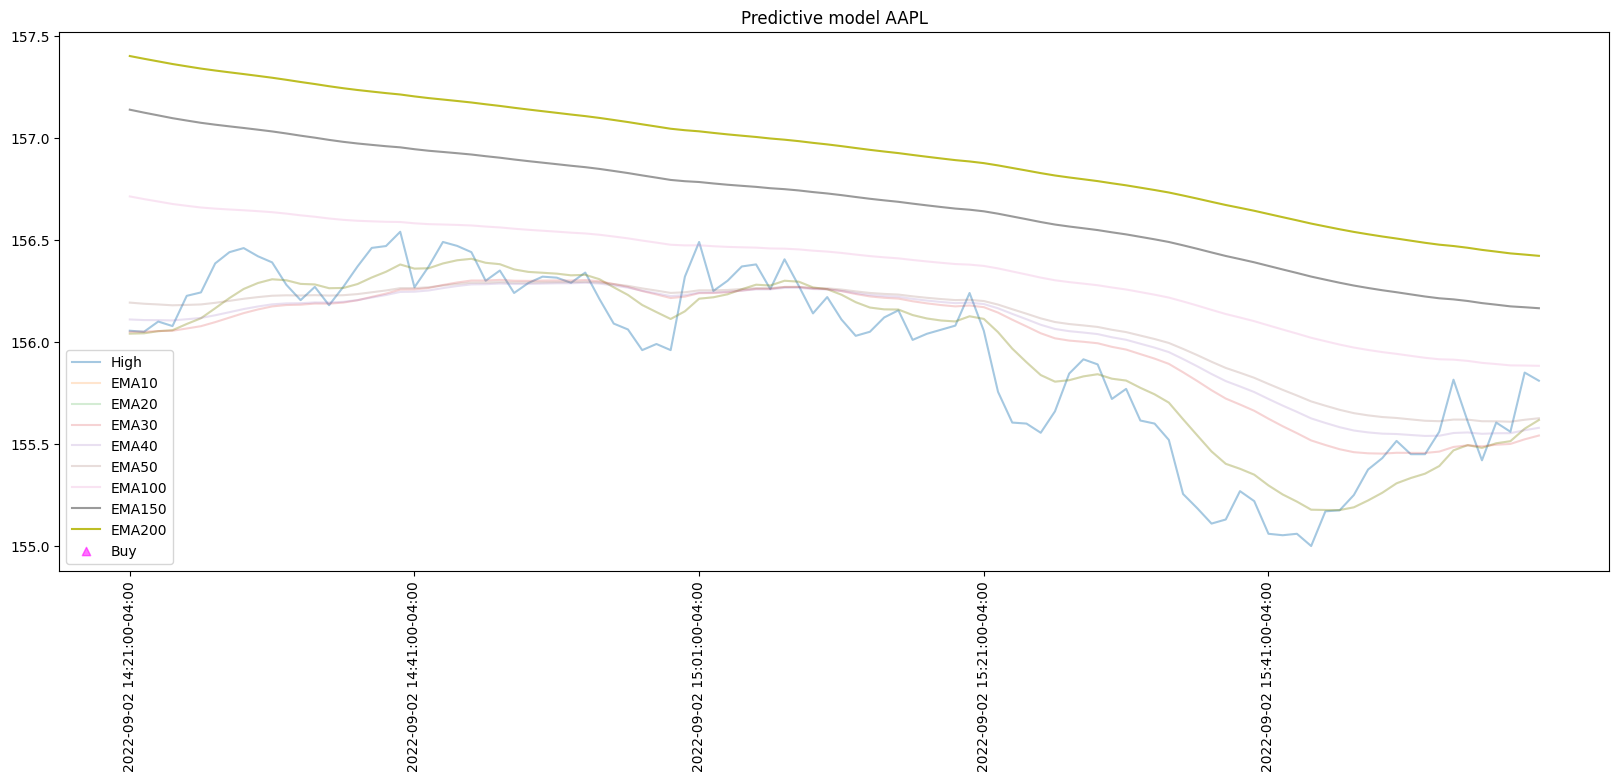

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1479 predicted class:  0.0
step:  1480 predicted class:  0.0
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 predicted class:  0.0
step:  1504 predicted class:  0.0
step:  1505 

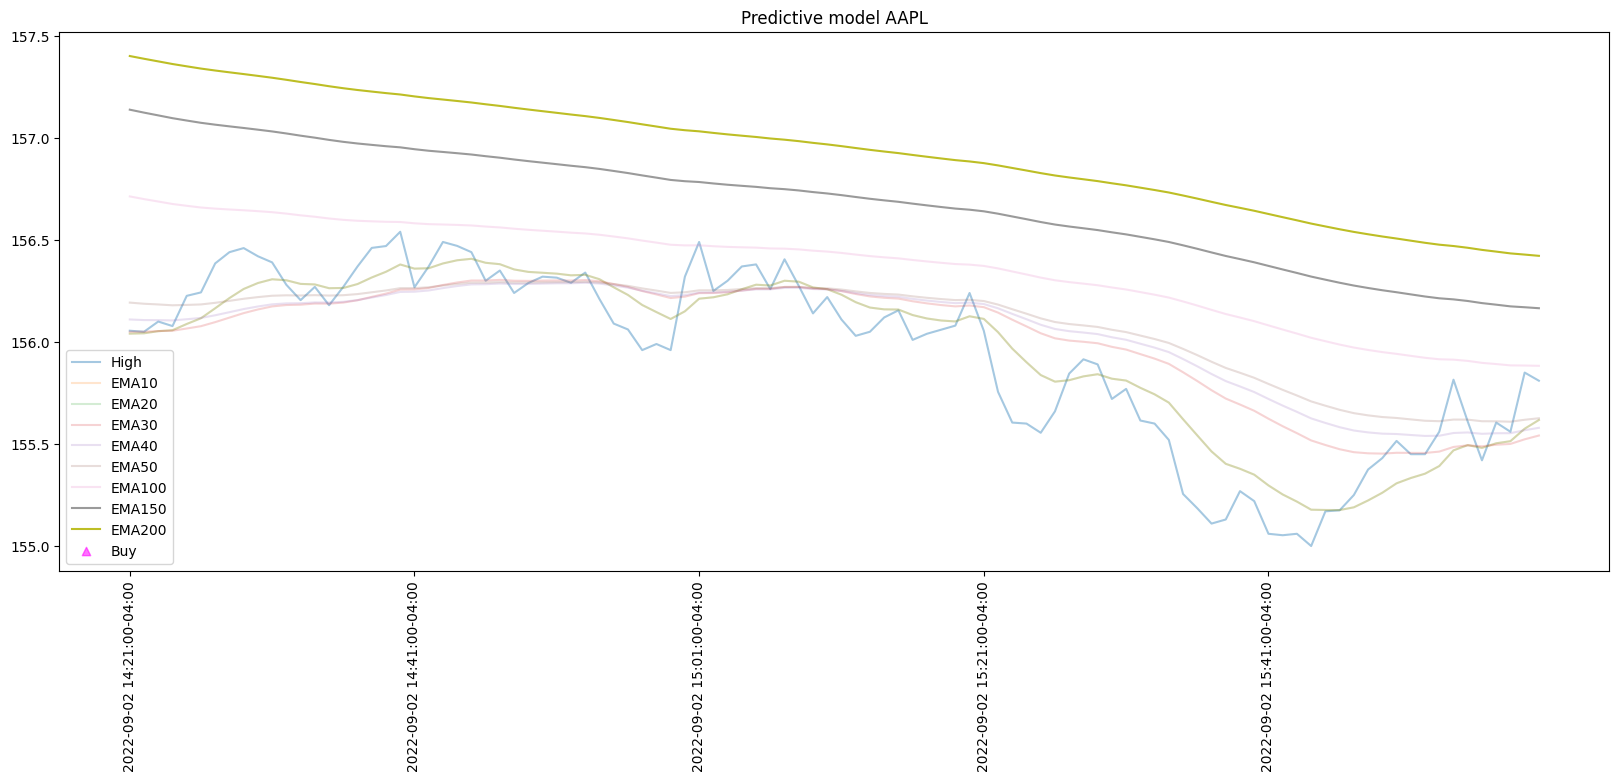

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1477 predicted class:  0.0
step:  1478 predicted class:  0.0
step:  1479 predicted class:  0.0
step:  1480 predicted class:  0.0
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 predicted class:  0.0
step:  1503 

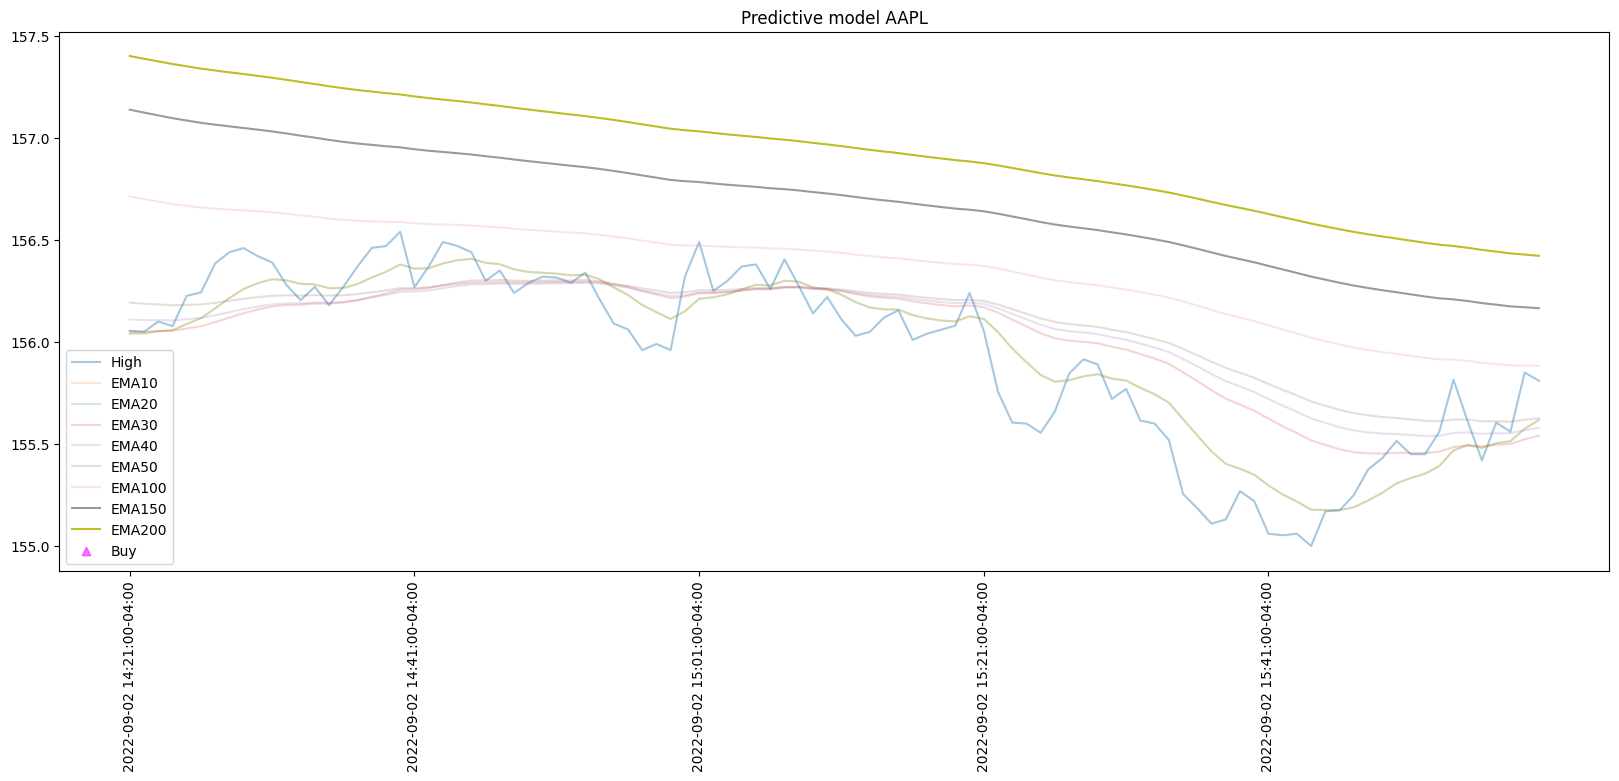

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1476 predicted class:  0.0
step:  1477 predicted class:  0.0
step:  1478 predicted class:  0.0
step:  1479 predicted class:  0.0
step:  1480 predicted class:  0.0
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 predicted class:  0.0
step:  1502 

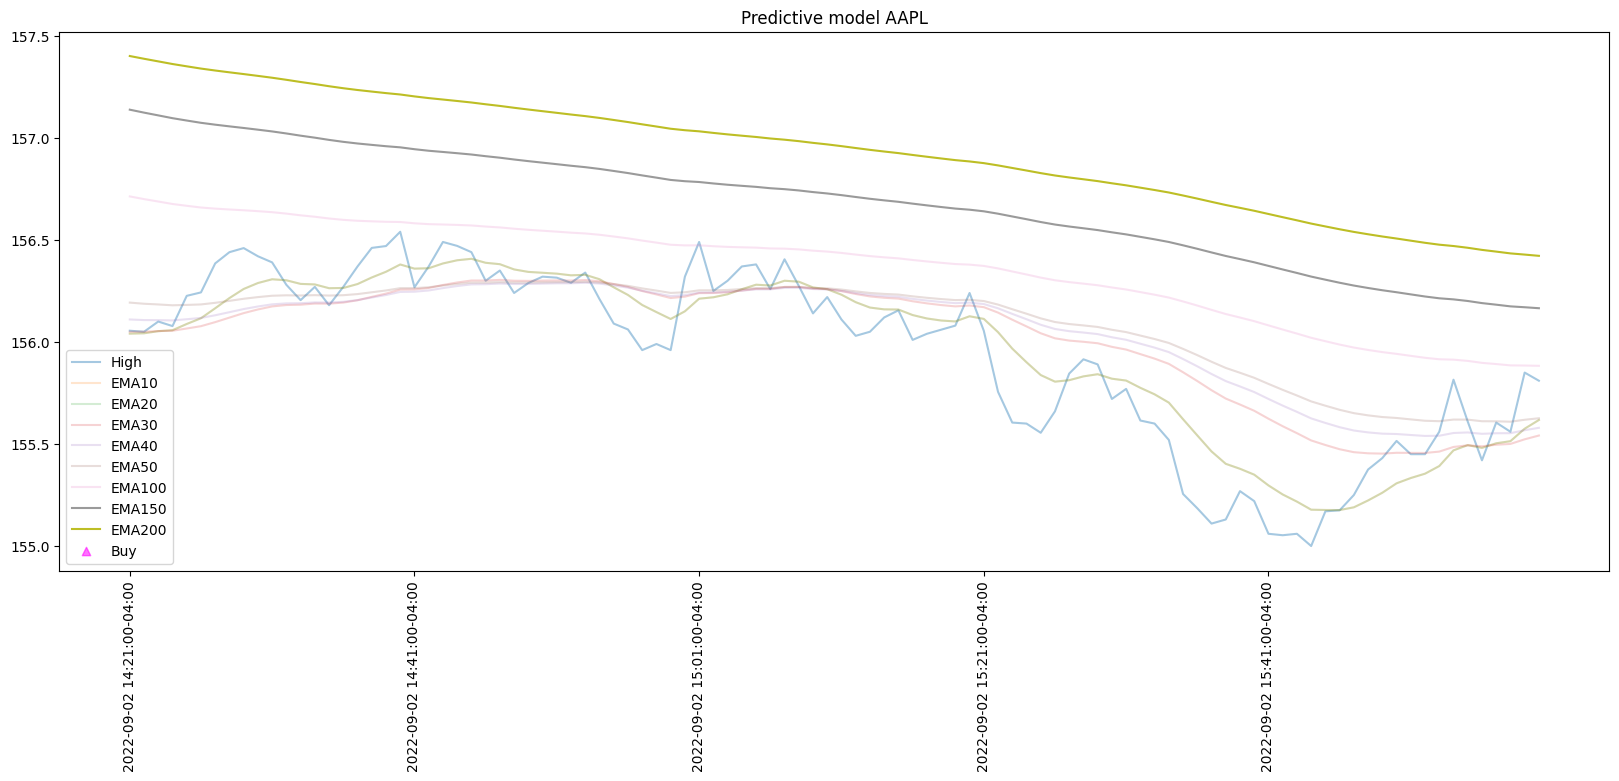

[*********************100%***********************]  1 of 1 completed
connected to yahoo
df length:  100
step:  1475 predicted class:  0.0
step:  1476 predicted class:  0.0
step:  1477 predicted class:  0.0
step:  1478 predicted class:  0.0
step:  1479 predicted class:  0.0
step:  1480 predicted class:  0.0
step:  1481 predicted class:  0.0
step:  1482 predicted class:  0.0
step:  1483 predicted class:  0.0
step:  1484 predicted class:  0.0
step:  1485 predicted class:  0.0
step:  1486 predicted class:  0.0
step:  1487 predicted class:  0.0
step:  1488 predicted class:  0.0
step:  1489 predicted class:  0.0
step:  1490 predicted class:  0.0
step:  1491 predicted class:  0.0
step:  1492 predicted class:  0.0
step:  1493 predicted class:  0.0
step:  1494 predicted class:  0.0
step:  1495 predicted class:  0.0
step:  1496 predicted class:  0.0
step:  1497 predicted class:  0.0
step:  1498 predicted class:  0.0
step:  1499 predicted class:  0.0
step:  1500 predicted class:  0.0
step:  1501 

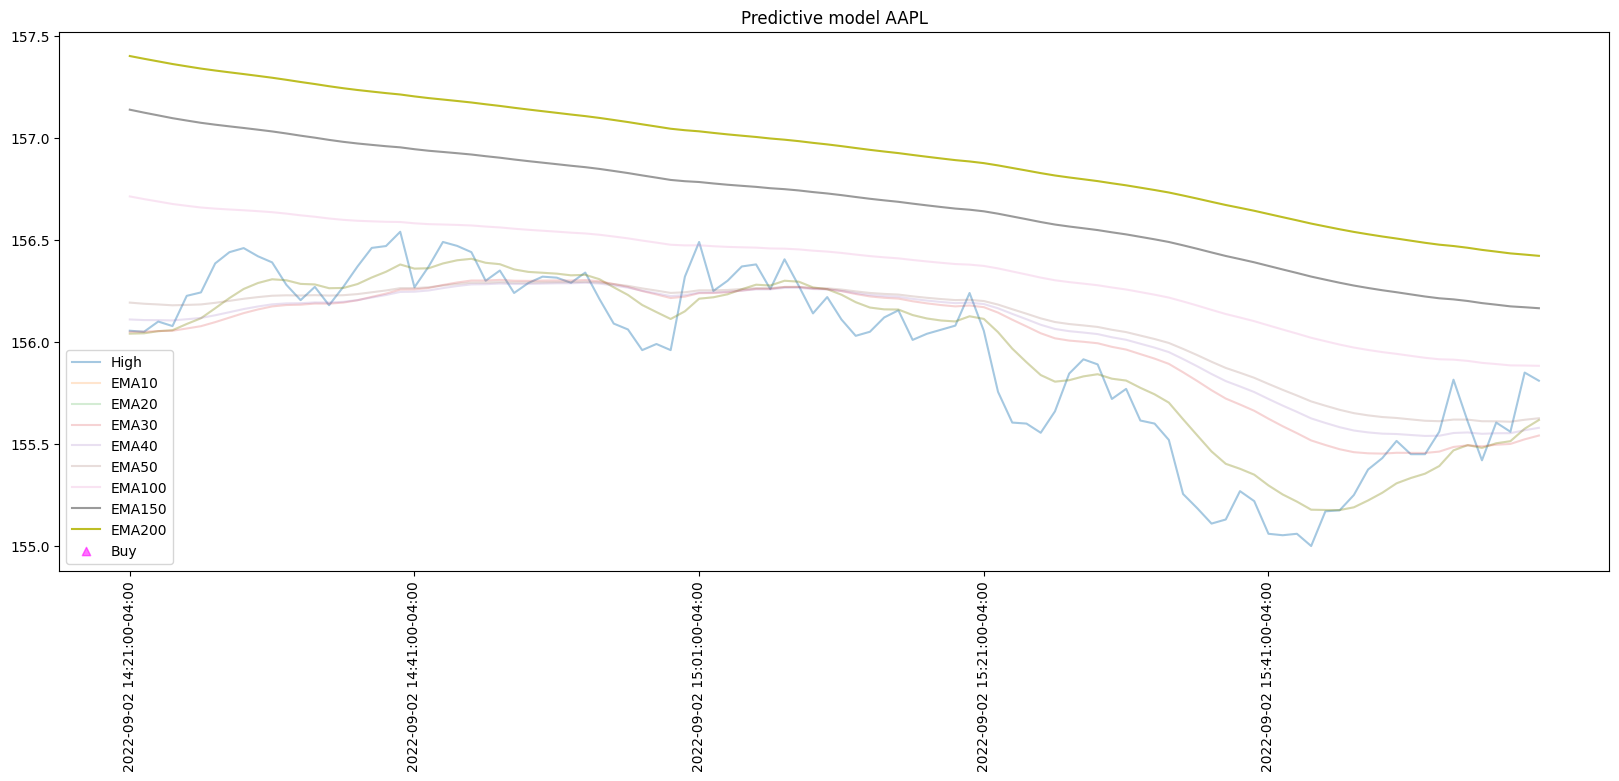

[*********************100%***********************]  1 of 1 completed
connected to yahoo


KeyboardInterrupt: 

In [58]:
# --- UNCOMMENT TO RUN CONTINUOUSLY ---

#while True:
#    
#    ## #data = get_ticker_data_from_db(symbol, db_name, table_name)
#    ##data = get_ticker_data_from_db_days_back(symbol, db_name, table_name)
#    ##df = resample_data(data, granularity=granularity)
#   
#
#    # yfinance temp workaround
#    df = get_data(symbol, interval)
#
#    # prepare dfs with extra indicators
#    out_df1 = superjumpTBB(df)      # superjumpTBB
#    out_df1.replace({False: 0, True: 1}, inplace=True)
#    out_df2 = HHLL_Strategy(df)  # HHHL indicator
#    out_df2.replace({False: 0, True: 1}, inplace=True)
#    out_df3 = HHLL_confirmation(df)  # HHLL confirmation
#    # converting 'u','d', 'none' to integers for 'trend_conf' col
#    out_df3.replace({'d': 0, 'u': 1, 'none': -1}, inplace=True)
#    out_df4 = HHLL_Channel(df)
#
#    # compute general indicators, features and target
#    df = compute_technical_indicators(df)
#    df = compute_features(df)
#    df = define_target_condition(df)
#
#    # merge with custom indicators
#    df = pd.merge(df, out_df1, how='inner', on='Date')
#    df = pd.merge(df, out_df2, how='inner', on='Date')
#    df = pd.merge(df, out_df3, how='inner', on='Date')
#    df = pd.merge(df, out_df4, how='inner', on='Date')
#
#    # actual prediction
#    # can take longer if the dataframe is big
#    # so we are making shorter dataframe for this
#    df_short = df.iloc[-100:]
#    
#    predict_timeseries(df_short, clf)
#
#    # zoomed in plot view
#    ticks_back = 500 # lookback n candles from now
#    plot_stock_prediction_zoom(df_short, symbol, ticks_back)
#
#
#
#    time.sleep(60)
